## 3. Data exploration

### 1. Prepare de dictionary
#### 1. Tokenize

In [38]:
import gensim
import pandas as pd
from gensim.utils import simple_preprocess

df = pd.read_csv('../dataset/Lyrics_en_clean.csv')
for row in df.itertuples(index=True, name='Pandas'):
    lyric = getattr(row, "Lyrics")
    index = getattr(row, "Index")    
    df.at[index, 'Lyrics'] = gensim.utils.simple_preprocess(str(lyric), deacc=True)
df    

,Band,Song,Lyrics
0,Elijah Blake,Everyday,"[no, no, aint, ever, trapped, out, the, bando,..."
1,Elijah Blake,Live Till We Die,"[the, drinks, go, down, and, smoke, goes, up, ..."
2,Elijah Blake,The Otherside,"[she, dont, live, on, planet, earth, no, more,..."
3,Elijah Blake,Pinot,"[trippin, off, that, grigio, mobbin, lights, l..."
4,Elijah Blake,Shadows & Diamonds,"[see, midnight, panther, so, gallant, and, so,..."
5,Elijah Blake,Uno,"[just, want, to, ready, your, mind, cause, ill..."
6,Elin Lanto,As Long as I Can Dream,"[watch, the, leaves, fall, to, the, ground, su..."
7,Elio e le Storie Tese,John Holmes,"[when, was, just, boy, everyone, made, fun, of..."
8,Elis,Betrayal,"[bonus, track, betrayal, you, betrayed, me, yo..."
9,Elis,Child,"[child, is, born, out, of, the, womb, of, moth..."


#### 2. Create bigrams and trigrams models

In [39]:
from gensim.models.phrases import Phrases, Phraser

lyrics = list()
for row in df.itertuples(index=True, name='Pandas'):
    lyric = getattr(row, "Lyrics")
    lyrics.append(lyric)
    
bi_prhases = Phrases(lyrics, min_count=5, threshold=40)
tri_prhases = Phrases(bi_prhases[lyrics], threshold=40)  

bigram = Phraser(bi_prhases)
trigram = Phraser(tri_prhases)



C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


#### 3. Remove stop words

In [40]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['s', 'chorus'])

new_lyrics = list()
for lyric in lyrics:
    new_lyric = list()
    for word in lyric:
        if(word not in stop_words):
            new_lyric.append(word)
    new_lyrics.append(new_lyric)
    
#print(lyrics[0])
#print(new_lyrics[0])
lyrics = new_lyrics
del new_lyrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jescobedo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 4. Lemmatize words

In [41]:
bigram_lyrics = list()
for lyric in lyrics:
    bigram_lyrics.append(bigram[lyric])
lyrics = bigram_lyrics
del bigram_lyrics

In [43]:
import spacy
import en_core_web_sm

# python -m spacy download en
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
lemma_lyrics = list()
for lyric in lyrics:
    doc = nlp(" ".join(lyric)) 
    lemma_lyric = list()
    for token in doc:
        if(token.pos_ in allowed_postags):
            lemma_lyric.append(token.lemma_)
    lemma_lyrics.append(lemma_lyric)


print(lemma_lyrics[:1])
lyrics = lemma_lyrics

[['be', 'not', 'ever', 'trap', 'bando', 'lord', 'do', 'not', 'get', 'wrong', 'know', 'couple', 'niggas', 'be', 'place', 'everybody', 'know', 'name', 'say', 'get', 'watch', 'attitude', 'see', 'money', 'man', 'start', 'actin', 'strange', 'fuck', 'fuck', 'never', 'say', 'be', 'brand_new', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'have', 'talkin', 'shit', 'nigga', 's', 'regular', 'have', 'love', 'thick', 'life', 'spectacular', 'spend', 'be', 'die', 'rich', 'nigga', 'be', 'flexin', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'see', 'wanna', 'hot', 'singer', 'swear', 'sound', 'start', 'bottom', 'far', 'motto', 'niggasll', 'never', 'drake', 'shout', 'ovo', 'prolly', 'do', 'not', 'know', 'stay', 'cut', 'do', 'not', 'fuck', 'body', 'that', 's', 'pun', 'nobody', 'know', 'name', 'runnin', 'dream', 'be', 'not', 'hard', 'break', 'bread', 'swear', 'pull', 'plate', 'eat', 'starve', 'be', 'winnin', 'crew', '

In [46]:
import pickle

#SAVE LYRICS to disk
with open('../dataset/lemma_lyrics', 'wb') as fp:
    pickle.dump(lemma_lyrics, fp)
del lemma_lyrics

Most common words

In [47]:
from collections import Counter

words = list()
for lyric in lyrics:
    for word in lyric:
        words.append(word)

word_freq = Counter(words)

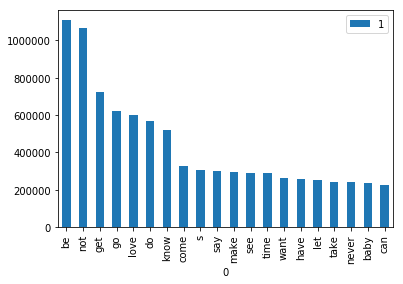

In [48]:
import pandas as pd
%matplotlib inline

df = pd.DataFrame.from_dict(word_freq.most_common(20))
df.plot(x=0, kind ='bar')

#### 5. Create corpus

In [49]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

id2word = corpora.Dictionary(lyrics)
id2word.save("../dataset/lemma_lyrics_dict")

bow_corpus = list()

for lyric in lyrics:
    bow_corpus.append(id2word.doc2bow(lyric))

tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]
print(bow_corpus[0])
print(tfidf_corpus[0])

[(0, 2), (1, 1), (2, 1), (3, 13), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 3), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 45), (23, 1), (24, 3), (25, 3), (26, 1), (27, 5), (28, 1), (29, 6), (30, 1), (31, 1), (32, 1), (33, 4), (34, 3), (35, 1), (36, 1), (37, 1), (38, 4), (39, 1), (40, 2), (41, 1), (42, 2), (43, 2), (44, 6), (45, 1), (46, 1), (47, 2), (48, 7), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 3), (56, 3), (57, 1), (58, 5), (59, 2), (60, 2), (61, 3), (62, 1), (63, 1), (64, 1), (65, 3), (66, 3), (67, 2), (68, 1), (69, 1), (70, 1), (71, 2), (72, 3), (73, 2), (74, 3), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)]
[(0, 0.05693230226707338), (1, 0.027704914478609205), (2, 0.04549673720943144), (3, 0.0289448229988323), (4, 0.015806998693867935), (5, 0.024025594355196165), (6, 0.023098009819700793), (7, 0.025811526273479265), (8, 0.010569261638354028), (9, 0.006612118130594775), (10, 0.0244344778227

#### 6. Word2Vec

In [50]:
from gensim.models.word2vec import Word2Vec

word2vec = Word2Vec(lyrics, workers=4, iter=3)
word_vectors = word2vec.wv
word2vec.save("../dataset/word2vec")

In [51]:
word_vectors.similar_by_word("love")

[('loving', 0.7323824763298035),
 ('baby', 0.6846239566802979),
 ('true', 0.6691523790359497),
 ('know', 0.668067216873169),
 ('darling', 0.6394789218902588),
 ('want', 0.6322681307792664),
 ('darlin', 0.6292194128036499),
 ('unconditional', 0.6217715740203857),
 ('give', 0.6116681694984436),
 ('babe', 0.6101255416870117)]

In [52]:
word_vectors.similar_by_word("hate")

[('jealousy', 0.5900207757949829),
 ('envy', 0.5282406806945801),
 ('complicate', 0.5153257846832275),
 ('suffer', 0.5131679773330688),
 ('hater', 0.4938468337059021),
 ('disgust', 0.49337294697761536),
 ('anger', 0.49008268117904663),
 ('because', 0.48505645990371704),
 ('relate', 0.4771983325481415),
 ('worst_enemy', 0.47578877210617065)]

In [53]:
word_vectors.similar_by_word("god")

[('bless', 0.6710283756256104),
 ('almighty', 0.6522773504257202),
 ('mercy', 0.6190482378005981),
 ('lord', 0.6134485006332397),
 ('savior', 0.596627414226532),
 ('blessed', 0.5921716094017029),
 ('redeemer', 0.5857529640197754),
 ('righteousness', 0.5798813104629517),
 ('father', 0.57902991771698),
 ('righteous', 0.5758235454559326)]

In [54]:
word_vectors.similar_by_word("dog")

[('bark', 0.6879298686981201),
 ('cat', 0.6528154611587524),
 ('leash', 0.6073524355888367),
 ('hog', 0.5716254711151123),
 ('dog_diggie', 0.5571916103363037),
 ('woof', 0.5513795614242554),
 ('buying_chihuahua', 0.5272702574729919),
 ('doggy', 0.5204506516456604),
 ('bark_bark', 0.5008241534233093),
 ('diggie_diggie', 0.4973498582839966)]

### 7. Doc2Vec

In [55]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_lyrics = [TaggedDocument(lyric, [i]) for i, lyric in enumerate(lyrics)]

doc2vec = Doc2Vec(tagged_lyrics, workers=4, epochs=3)
doc_vectors = doc2vec.wv

doc2vec.save("../dataset/doc2vec")

In [56]:
doc_vectors.similar_by_word("love")

[('baby', 0.7741656303405762),
 ('know', 0.7731038331985474),
 ('want', 0.7322003245353699),
 ('give', 0.7283698916435242),
 ('true', 0.7211328744888306),
 ('never', 0.7093902826309204),
 ('heart', 0.7080841064453125),
 ('ever', 0.7054758071899414),
 ('loving', 0.7040247917175293),
 ('enough', 0.6937674283981323)]

In [57]:
doc_vectors.similar_by_word("hate")

[('jealousy', 0.5753298997879028),
 ('suffer', 0.5504946708679199),
 ('anger', 0.546317458152771),
 ('hurt', 0.545412540435791),
 ('hater', 0.5356835126876831),
 ('fuck', 0.5284494161605835),
 ('trust', 0.5213353633880615),
 ('love', 0.5191253423690796),
 ('want', 0.5155864953994751),
 ('really', 0.5144102573394775)]

In [58]:
doc_vectors.similar_by_word("god")

[('lord', 0.6746373176574707),
 ('bless', 0.6299853920936584),
 ('mercy', 0.6077107191085815),
 ('earth', 0.5897377729415894),
 ('pray', 0.5892517566680908),
 ('holy', 0.5853118300437927),
 ('grace', 0.5777762532234192),
 ('father', 0.5721375942230225),
 ('praise', 0.5707368850708008),
 ('savior', 0.5624905824661255)]

In [59]:
doc_vectors.similar_by_word("dog")

[('cat', 0.7068536281585693),
 ('bark', 0.6419731378555298),
 ('wolf', 0.5549842119216919),
 ('pavlovs', 0.5493366122245789),
 ('bite', 0.527361273765564),
 ('hog', 0.506736695766449),
 ('leash', 0.5025930404663086),
 ('diggie_diggie', 0.4981194734573364),
 ('dog_diggie', 0.476357102394104),
 ('bone', 0.4745815694332123)]